In [22]:
import pandas as pd
from sklearn.datasets import load_iris

In [23]:
data = load_iris()
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [24]:
df = pd.DataFrame(data.data, columns= data['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


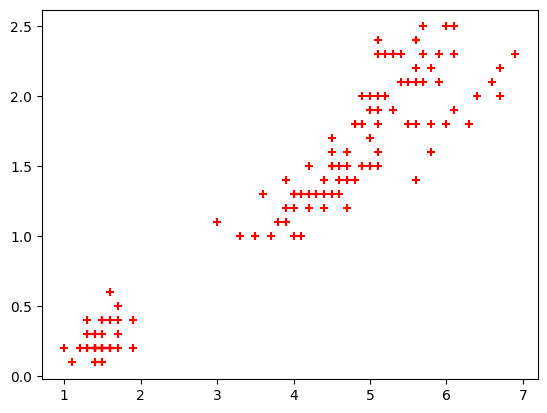

In [25]:
import matplotlib.pyplot as plt 
plt.scatter(df['petal length (cm)'],df[ 'petal width (cm)'], c= 'r', marker='+')
plt.show()

In [26]:
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

km = KMeans(n_clusters= 3)
y_pred=km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])


In [27]:
df['cluster'] = y_pred

In [28]:
newdf = df.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1)
newdf

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [29]:
km.cluster_centers_


array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [30]:
cluster0=df[df['cluster']==0]
cluster1=df[df['cluster']==1]
cluster2=df[df['cluster']==2]

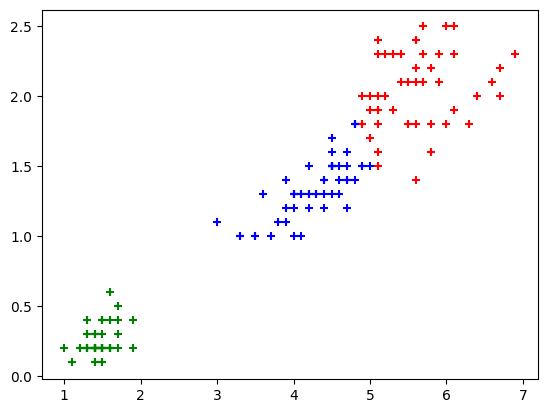

In [31]:
plt.scatter(cluster0['petal length (cm)'], cluster0['petal width (cm)'], c= 'r', marker= '+')
plt.scatter(cluster1['petal length (cm)'], cluster1['petal width (cm)'], c= 'g', marker= '+')
plt.scatter(cluster2['petal length (cm)'], cluster2['petal width (cm)'], c= 'b', marker= '+')
plt.show()

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['petal length (cm)']=scaler.fit_transform(df[['petal length (cm)']])
df['petal width (cm)']=scaler.fit_transform(df[['petal width (cm)']])

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,0.067797,0.041667,1
1,4.9,3.0,0.067797,0.041667,1
2,4.7,3.2,0.050847,0.041667,1
3,4.6,3.1,0.084746,0.041667,1
4,5.0,3.6,0.067797,0.041667,1
...,...,...,...,...,...
145,6.7,3.0,0.711864,0.916667,0
146,6.3,2.5,0.677966,0.750000,0
147,6.5,3.0,0.711864,0.791667,0
148,6.2,3.4,0.745763,0.916667,0


In [33]:
y_pred = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])

In [34]:
df['cluster'] = y_pred

In [35]:
cluster0=df[df['cluster']==0]
cluster1=df[df['cluster']==1]
cluster2=df[df['cluster']==2]

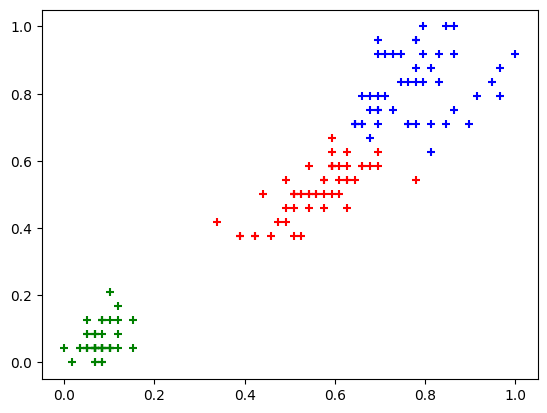

In [36]:
plt.scatter(cluster0['petal length (cm)'], cluster0['petal width (cm)'], c= 'r', marker= '+')
plt.scatter(cluster1['petal length (cm)'], cluster1['petal width (cm)'], c= 'g', marker= '+')
plt.scatter(cluster2['petal length (cm)'], cluster2['petal width (cm)'], c= 'b', marker= '+')
plt.show()

In [37]:
sse = []

for i in range(1,10):
    km = KMeans(n_clusters= i)
    km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

In [38]:
sse

[28.368353219727197,
 5.176463590044368,
 1.701874688192097,
 1.1588792731667124,
 0.8535683225340073,
 0.6801035704886194,
 0.5651273455703979,
 0.4955228383283453,
 0.4132667782512473]

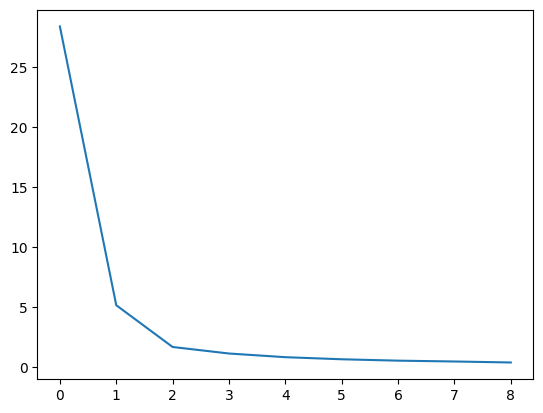

In [39]:
plt.plot(sse)
plt.show()